In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('Latest Covid-19 India Status.csv')
df.head()

,State/UTs,Total Cases,Active,Discharged,Deaths,Active Ratio (%),Discharge Ratio (%),Death Ratio (%)
0,Andaman and Nicobar,7566,6,7431,129,0.08,98.22,1.70
1,Andhra Pradesh,2014116,14693,1985566,13857,0.73,98.58,0.69
2,Arunachal Pradesh,53031,863,51908,260,1.63,97.88,0.49
3,Assam,589426,6901,576865,5660,1.17,97.87,0.96
4,Bihar,725708,100,715955,9653,0.01,98.66,1.33


In [4]:
df.drop(['State/UTs'], axis=1, inplace=True)
df.head()

,Total Cases,Active,Discharged,Deaths,Active Ratio (%),Discharge Ratio (%),Death Ratio (%)
0,7566,6,7431,129,0.08,98.22,1.70
1,2014116,14693,1985566,13857,0.73,98.58,0.69
2,53031,863,51908,260,1.63,97.88,0.49
3,589426,6901,576865,5660,1.17,97.87,0.96
4,725708,100,715955,9653,0.01,98.66,1.33


In [5]:
df.dropna(inplace=True)
data = df.reset_index(drop=True)
data

,Total Cases,Active,Discharged,Deaths,Active Ratio (%),Discharge Ratio (%),Death Ratio (%)
0,7566,6,7431,129,0.08,98.22,1.70
1,2014116,14693,1985566,13857,0.73,98.58,0.69
2,53031,863,51908,260,1.63,97.88,0.49
3,589426,6901,576865,5660,1.17,97.87,0.96
4,725708,100,715955,9653,0.01,98.66,1.33
5,65105,40,64252,813,0.06,98.69,1.25
6,1004451,412,990484,13555,0.04,98.61,1.35
7,10663,4,10655,4,0.04,99.92,0.04
8,1437764,349,1412333,25082,0.02,98.23,1.74
9,173955,877,169877,3201,0.50,97.66,1.84


In [6]:
data

,Total Cases,Active,Discharged,Deaths,Active Ratio (%),Discharge Ratio (%),Death Ratio (%)
0,7566,6,7431,129,0.08,98.22,1.70
1,2014116,14693,1985566,13857,0.73,98.58,0.69
2,53031,863,51908,260,1.63,97.88,0.49
3,589426,6901,576865,5660,1.17,97.87,0.96
4,725708,100,715955,9653,0.01,98.66,1.33
5,65105,40,64252,813,0.06,98.69,1.25
6,1004451,412,990484,13555,0.04,98.61,1.35
7,10663,4,10655,4,0.04,99.92,0.04
8,1437764,349,1412333,25082,0.02,98.23,1.74
9,173955,877,169877,3201,0.50,97.66,1.84


In [7]:
df_scale = data.copy()

scaler = StandardScaler()

df_scale = scaler.fit_transform(df_scale)
len(df_scale)

36

In [8]:
data = pd.DataFrame(df_scale)
data.columns = df.columns

data_cluster = data.copy()
data.head()
data.shape

(36, 7)

**K-MEANS**

Text(0, 0.5, 'Inertia')

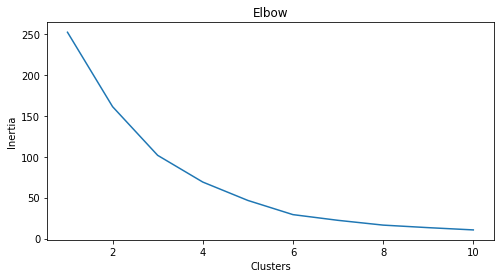

In [9]:
from sklearn.cluster import KMeans

clusters = []
for i in range (1,11):
    km = KMeans(n_clusters=i).fit(data)
    clusters.append(km.inertia_)

# tampilkan plot
fig, ax = plt.subplots(figsize=(8,4))
sns.lineplot(x=list(range(1,11)), y=clusters, ax=ax)
ax.set_title('Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

In [10]:
model_kmeans3 = KMeans(n_clusters=3)
model_kmeans4 = KMeans(n_clusters=4)

# Train Model
model_kmeans3.fit(data)
model_kmeans4.fit(data)

# # Menambah Label pada data
data_cluster['cluster_kmeans3'] = model_kmeans3.labels_
data_cluster['cluster_kmeans4'] = model_kmeans4.labels_

data_cluster

,Total Cases,Active,Discharged,Deaths,Active Ratio (%),Discharge Ratio (%),Death Ratio (%),cluster_kmeans3,cluster_kmeans4
0,-0.687007,-0.286550,-0.692535,-0.519710,-0.447851,0.294091,0.780854,1,0
1,0.838157,0.114302,0.861938,0.071586,-0.200162,0.436894,-1.036807,1,0
2,-0.652450,-0.263160,-0.657584,-0.514067,0.142792,0.159221,-1.396740,1,0
3,-0.244740,-0.098365,-0.245058,-0.281477,-0.032496,0.155254,-0.550897,1,0
4,-0.141153,-0.283985,-0.135757,-0.109490,-0.474525,0.468628,0.114979,1,0
5,-0.643272,-0.285622,-0.647884,-0.490248,-0.455472,0.480528,-0.028995,1,0
6,0.070718,-0.275469,0.079975,0.058578,-0.463093,0.448794,0.150972,1,0
7,-0.684653,-0.286605,-0.690002,-0.525094,-0.463093,0.968440,-2.206589,1,0
8,0.400076,-0.277189,0.411476,0.555072,-0.470715,0.298058,0.852841,1,0
9,-0.560536,-0.262778,-0.564881,-0.387392,-0.287806,0.071953,1.032807,1,0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


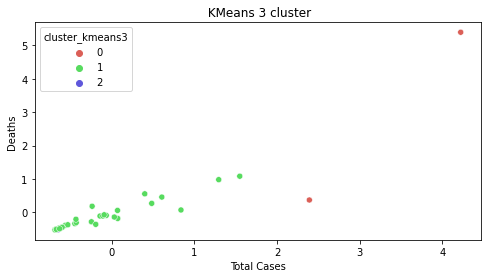

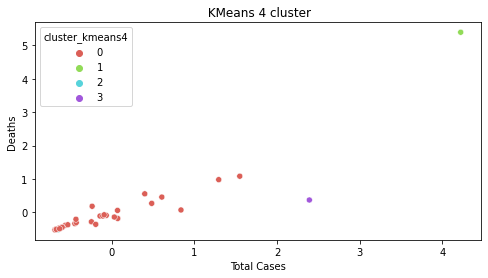

In [11]:

## Tampilkan Plot
plt.figure(figsize=(8,4))
sns.scatterplot(data_cluster['Total Cases'], data_cluster['Deaths'], hue=data_cluster['cluster_kmeans3'], palette=sns.color_palette('hls',3))
plt.title(' KMeans 3 cluster')

plt.figure(figsize=(8,4))
sns.scatterplot(data_cluster['Total Cases'], data_cluster['Deaths'], hue=data_cluster['cluster_kmeans4'], palette=sns.color_palette('hls',4))
plt.title(' KMeans 4 cluster')
plt.show()

**K-MEDOIDS**

In [12]:

!pip install scikit-learn-extra
from sklearn_extra.cluster import KMedoids

     |████████████████████████████████| 1.7 MB 5.3 MB/s 
     |████████████████████████████████| 22.3 MB 917 kB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


In [13]:

model_kmedoids = KMedoids(n_clusters=4, random_state=0)
model_kmedoids.fit(data)

data_cluster['Cluster K-Medoids'] = model_kmedoids.labels_
data_cluster

,Total Cases,Active,Discharged,Deaths,Active Ratio (%),Discharge Ratio (%),Death Ratio (%),cluster_kmeans3,cluster_kmeans4,Cluster K-Medoids
0,-0.687007,-0.286550,-0.692535,-0.519710,-0.447851,0.294091,0.780854,1,0,1
1,0.838157,0.114302,0.861938,0.071586,-0.200162,0.436894,-1.036807,1,0,3
2,-0.652450,-0.263160,-0.657584,-0.514067,0.142792,0.159221,-1.396740,1,0,0
3,-0.244740,-0.098365,-0.245058,-0.281477,-0.032496,0.155254,-0.550897,1,0,0
4,-0.141153,-0.283985,-0.135757,-0.109490,-0.474525,0.468628,0.114979,1,0,2
5,-0.643272,-0.285622,-0.647884,-0.490248,-0.455472,0.480528,-0.028995,1,0,0
6,0.070718,-0.275469,0.079975,0.058578,-0.463093,0.448794,0.150972,1,0,2
7,-0.684653,-0.286605,-0.690002,-0.525094,-0.463093,0.968440,-2.206589,1,0,3
8,0.400076,-0.277189,0.411476,0.555072,-0.470715,0.298058,0.852841,1,0,2
9,-0.560536,-0.262778,-0.564881,-0.387392,-0.287806,0.071953,1.032807,1,0,1


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


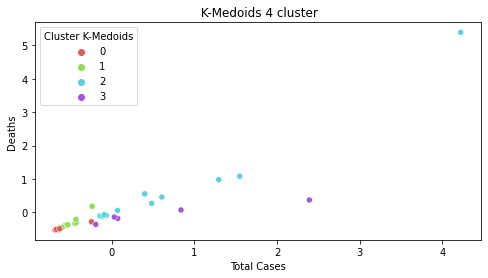

In [14]:

plt.figure(figsize=(8,4))
sns.scatterplot(data_cluster['Total Cases'], data_cluster['Deaths'], hue=data_cluster['Cluster K-Medoids'], palette=sns.color_palette('hls',4))
plt.title(' K-Medoids 4 cluster')
plt.show()

**HIERARCHY**

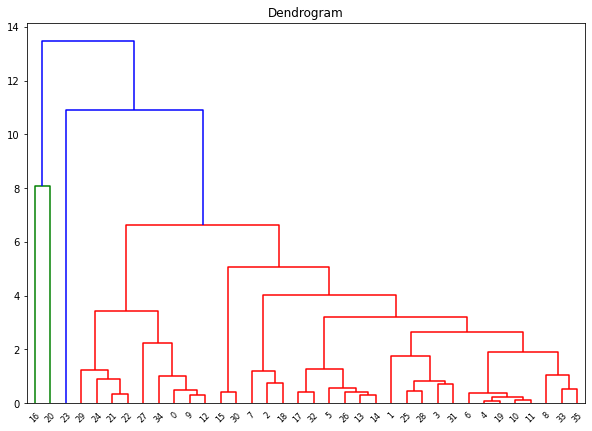

In [15]:
from scipy.cluster.hierarchy import dendrogram, linkage

plt.figure(figsize=(10,7))
plt.title("Dendrogram")
dend = dendrogram(linkage(data, method="ward"))
plt.axhline(y=35, color='r', linestyle='--')

Text(0.5, 1.0, 'Hierarchy')

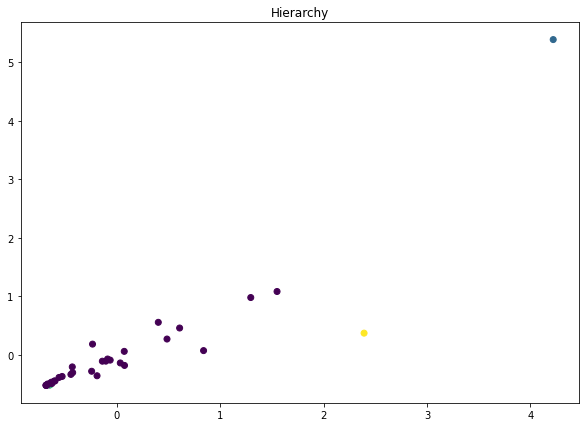

In [16]:
from sklearn.cluster import AgglomerativeClustering

model_agglo = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
model_agglo.fit_predict(data)
plt.figure(figsize=(10,7))
plt.scatter(data_cluster['Total Cases'], data_cluster['Deaths'], c=model_agglo.labels_)
plt.title('Hierarchy')

**DBSCAN**

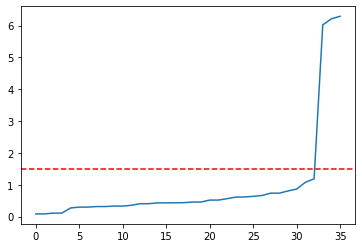

In [17]:
from sklearn.neighbors import NearestNeighbors

neigh = NearestNeighbors(n_neighbors=13)
nbrs = neigh.fit(data)
distances, indices = nbrs.kneighbors(data)

distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)
plt.axhline(y=1.5, color='r', linestyle='--')

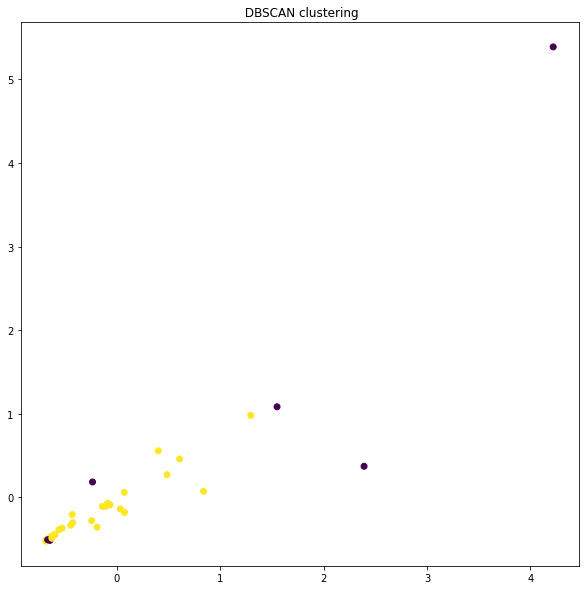

In [18]:
from sklearn.cluster import DBSCAN

model_dbscan = DBSCAN(eps=1.5, min_samples=13)
model_dbscan.fit(data)

plt.figure(figsize=(10,10))
plt.scatter(data_cluster['Total Cases'], data_cluster['Deaths'], c=model_dbscan.labels_)
plt.title(' DBSCAN clustering')
plt.show()